In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_columns', None)

In [4]:
product_df = pd.read_csv('data/my_data/product.csv', index_col=0)
review_df = pd.read_csv('data/my_data/review.csv', index_col=0)

In [6]:
product_df.shape
review_df.shape

(474, 4)

(27008, 6)

In [7]:
product_df.head()
review_df.head()

,id,brand,title,price
0,384,apple,"apple iphone 6 (space grey, 32 gb)",23999.000
1,385,apple,"apple iphone 6s (space grey, 32 gb)",33999.000
2,386,apple,"apple iphone 6s (rose gold, 32 gb)",33999.000
3,387,apple,"apple iphone se (space grey, 32 gb)",17999.000
4,388,apple,"apple iphone 6 (gold, 32 gb)",24299.000


,product__id,author,rating,title,content,date
0,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23
2,351,Sujeeth Nair S,5.000,Value for money,Excellent phone altogether. Only negative poin...,2011-08-23
3,351,Ponnuchamy Chinnasamy,5.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,2011-08-23
4,351,dr.sheeraz sarwar,5.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",2011-09-15


In [10]:
flipkart_df = pd.merge(
    product_df, 
    review_df, 
    
    left_on='id', 
    right_on='product__id',
    
    how='right'
)

In [12]:
flipkart_df.shape
flipkart_df.head()

(27008, 10)

,id,brand,title_x,price,product__id,author,rating,title_y,content,date
0,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23
2,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Sujeeth Nair S,5.000,Value for money,Excellent phone altogether. Only negative poin...,2011-08-23
3,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Ponnuchamy Chinnasamy,5.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,2011-08-23
4,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,dr.sheeraz sarwar,5.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",2011-09-15


In [14]:
flipkart_df = flipkart_df.drop(['id', 'product__id', 'author'], axis=1)

In [15]:
flipkart_df.head(2)

,brand,title_x,price,rating,title_y,content,date
0,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23


In [29]:
amazon_df = pd.read_csv('data/my_data/amazon_review1.csv', index_col=0)
amazon_df.head(2)

,brand,title_x,price,title_y,content,rating
date,,,,,,
2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5
2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5


In [30]:
amazon_df.shape
flipkart_df.shape

(42190, 6)

(27008, 7)

In [31]:
df = pd.concat([amazon_df, flipkart_df], axis=0)
df.shape

(69198, 7)

In [32]:
df.head()

,brand,title_x,price,title_y,content,rating,date
2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5.000,NaN
2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5.000,NaN
2013-06-29,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,A smartphone with a hulk's punch,"The Galaxy S4 is a great, great device in its ...",5.000,NaN
2013-07-01,samsung,samsung galaxy s3 gt-i9300 (pebble blue),31070.000,great,"awesome phone, upgraded from galaxy r, is much...",5.000,NaN
2013-07-04,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,AMAZON/UNIVERCEL NEVER,With great expectation with amazon India I had...,1.000,NaN


In [33]:
pd.to_datetime(df['date'])

2013-06-25          NaT
2013-06-25          NaT
2013-06-29          NaT
2013-07-01          NaT
2013-07-04          NaT
                ...    
27003        2018-05-12
27004        2018-05-14
27005        2018-05-14
27006        2018-05-14
27007        2018-05-15
Name: date, Length: 69198, dtype: datetime64[ns]

In [34]:
df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)

df.set_index('date', inplace=True)
df = df.loc[:"2017-12-31"]

df.rename(columns={'title_x': 'name', 'title_y': 'title'}, inplace=True)

df['price_grp'] = pd.cut(df['price'], [0, 5000, 15000, 20000], labels=['저가', '중가', '고가'])

In [35]:
df.head()

,brand,name,price,title,content,rating,price_grp
date,,,,,,,
2011-07-22,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,It does what it says !!!,I bought this phone and been using for last we...,4.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Value for money,Excellent phone altogether. Only negative poin...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,5.000,중가
2011-09-15,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",5.000,중가


In [42]:
df.groupby([df.index.year, df.index.quarter]).agg({'price': 'mean'})

price
date date          
2011 3     7005.000
     4     6564.214
2012 1     5837.250
     2     4456.945
     3     5203.164
     4     8851.987
2013 1     8228.694
     2    13098.951
     3    10574.770
     4    10106.358
2014 1     8955.434
     2     8895.550
     3     8969.058
     4    12091.026
2015 1    10409.730
     2    17200.320
     3    16498.556
     4    18839.613
2016 1    21684.773
     2    19896.658
     3    17594.872
     4    23765.043
2017 1    17576.598
     2    19595.137
     3    17528.829
     4    27268.716

<AxesSubplot:xlabel='date,date'>

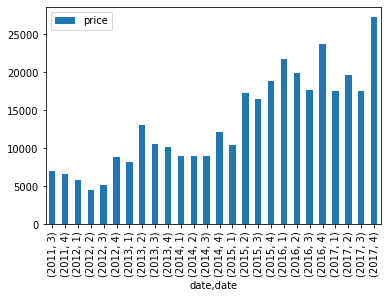

In [43]:
df.groupby([df.index.year, df.index.quarter]).agg({'price': 'mean'}).plot(kind='bar')

In [45]:
# 그래프를 바로 출력할 수 있는 명령여 (plot.show를 안 해도 되는 것)
%matplotlib inline

Text(0.5, 1.0, '기간별 제품 평균가격')

Text(0.5, 0, '기 간')

Text(0, 0.5, '가 격')

c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python37\lib\site-package

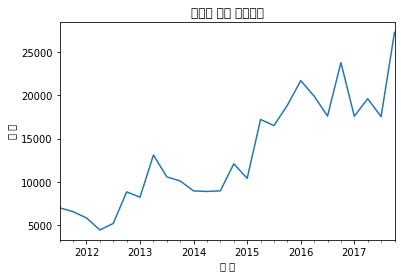

In [51]:
# resample은 groupby와 같음
ax = df.resample('Q')['price'].mean().plot()

ax.set_title('기간별 제품 평균가격')
ax.set_xlabel('기 간')
ax.set_ylabel('가 격')

In [53]:
df.head()

,brand,name,price,title,content,rating,price_grp
date,,,,,,,
2011-07-22,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,It does what it says !!!,I bought this phone and been using for last we...,4.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Value for money,Excellent phone altogether. Only negative poin...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,5.000,중가
2011-09-15,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",5.000,중가


In [54]:
df.groupby(['brand']).agg({'name': 'count'})

,name
brand,
apple,5399
mi,1558
micromax,8078
samsung,7284


<AxesSubplot:xlabel='brand'>

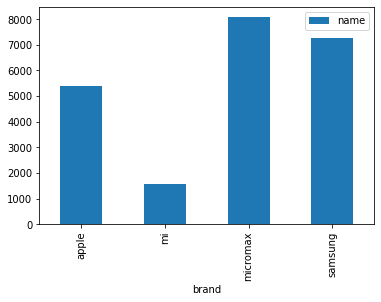

In [58]:
df.groupby(['brand']).agg({'name': 'count'}).plot(kind='bar')